# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


<div class="alert alert-info">
<b>Ce notebook a été réalisé par</b>: <br>

<li>BRASIL, Isabel</li>
<li>RAMOS, Pedro</li>

ISAE-Supaero, SD/SDD 2026
</div>

## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

### Réponse 1.1 

In [ ]:
import pandas
import matplotlib.pyplot as plt


dataframe=pandas.read_csv("./E1_Efficiency_Obs.csv",sep=',')

In [2]:
dataframe.head()

,Brand,Concentration,Efficiency
0,Brand_1,3.9479,3.2224
1,Brand_1,1.7838,1.5127
2,Brand_1,7.4415,4.3736
3,Brand_1,8.5625,5.2151
4,Brand_1,9.8002,5.4256


D'abord, on va faire un plot du rendement par la concentration en séparant les deux marques du moteur pour avoir une idée de ce qui se passe.

In [3]:
df_b1 = dataframe[dataframe['Brand']=='Brand_1']
df_b2 = dataframe[dataframe['Brand']=='Brand_2']

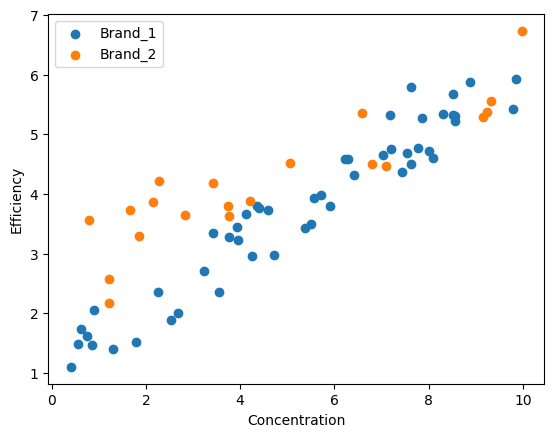

In [4]:
plt.figure()
plt.scatter(df_b1['Concentration'], df_b1['Efficiency'], label='Brand_1')
plt.scatter(df_b2['Concentration'], df_b2['Efficiency'], label='Brand_2')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()
plt.show()

Avec le graphique ci-dessus, on voit bien que l'efficience à l'air d'augmenter avec une concentration plus élevée de produit et la pente de cette augmentation semble diférente pour les deux marques, alors:

- oui, le produit semble avoir un effet positif sur l'efficience
- oui, il semble être différent entre les deux marques
- oui, il semble dépendre directement (c'est à dire non inversement) de la concéntration

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

### Réponse 1.2 

Comme, pour chaque marque de moteur on fait l'hypothèse de linéarité, on peut faire une régréssion lineaire où la variable de réponse est Efficiency et la variable quantitative est Concentration avec chaque variable qualitative (Brand). Aussi, comme on suppose que le bruit des observations suive une loi Normale **centrée**, la maximisation de la vraissemblance donne le même résultat que la minimisation des carrés ordinaires, alors, on peut utiliser son implémentation au statsmodels.

De cette façon, on peut :

- Tester si la concentration a un effet global sur le rendement (à travers des pentes)
- Tester si les marques présentent des différences (en analysant les différents pentes et les constantes $\beta_0$)
- Voir à quelle point la concentration influencie l'efficience (avec la valeur des pentes)

On préfére utiliser deux régréssions lineaires différentes au lieu d'une régression lineaire mixte car, alors, on aura exactament le modèle lineaire pour les moteurs de chaque marque, au lieu d'avoir juste un effet moyen de la concentration et la variance de son effet avec le changement de marque.

In [ ]:
import statsmodels.api as sm

In [16]:
x1 = df_b1['Concentration'].to_numpy()
x1 = x1.reshape(-1,1)
x1 = sm.add_constant(x1)
y1 = df_b1['Efficiency'].to_numpy()

x2 = df_b2['Concentration'].to_numpy()
x2 = x2.reshape(-1,1)
x2 = sm.add_constant(x2)
y2 = df_b2['Efficiency'].to_numpy()

lr_1 = sm.OLS(y1, x1).fit()
lr_2 = sm.OLS(y2, x2).fit()

In [11]:
lr_1.fit(x1,y1)
print('Pour Brand 1')
print(f'\tb_0={lr_1.intercept_:.4}, b_1={lr_1.coef_[0]:.4}')

lr_2.fit(x2,y2)
print('Pour Brand 2')
print(f'\tb_0={lr_2.intercept_:.4}, b_1={lr_2.coef_[0]:.4}')

Pour Brand 1
	b_0=1.151, b_1=0.4915
Pour Brand 2
	b_0=2.79, b_1=0.309


In [31]:
print(lr_1.pvalues)

[1.50042701e-13 9.05579587e-30]


In [33]:
print(lr_2.pvalues)

[5.85746001e-11 1.31844687e-07]


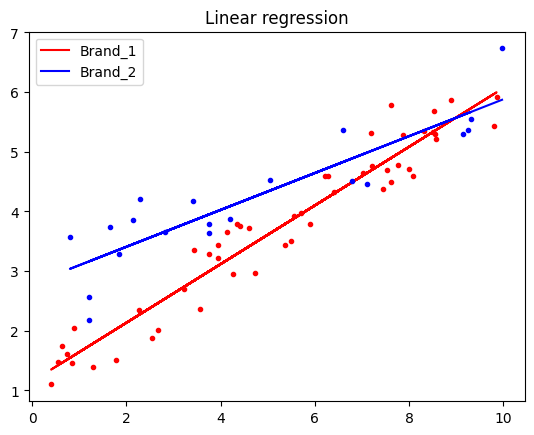

In [20]:
# representation du resultat
plt.figure()
plt.plot(x1[:,1], y1, 'r.')
plt.plot(x1[:,1], lr_1.predict(x1), 'r-', label='Brand_1')
plt.plot(x2[:,1], y2, 'b.')
plt.plot(x2[:,1], lr_2.predict(x2), 'b-', label='Brand_2')
plt.legend()
plt.title('Linear regression')
plt.show()

On voit que les deux droites approximent bien la variabilité des données et, comme répondu dans 1.1:

- La concentration a un effet positif sur l'efficience, une fois que, pour les deux modèles, P>|t| est tellement petit, ce qui signifie que les coefficiénts sont statistiquement significativement différent de zéro
- On voit bien que les deux coefficients des deux modéles sont assez differents, alors, oui, l'effet dépend de la marque
- Comme, par le premier point, $b_1$ est très probable d'être non-nul, ça veut dire que l'effet dépend de la concentration

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 
 

### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.

### Réponses
2.1. Les capteurs pertinents ont été les capteurs 15, 01 et 12.

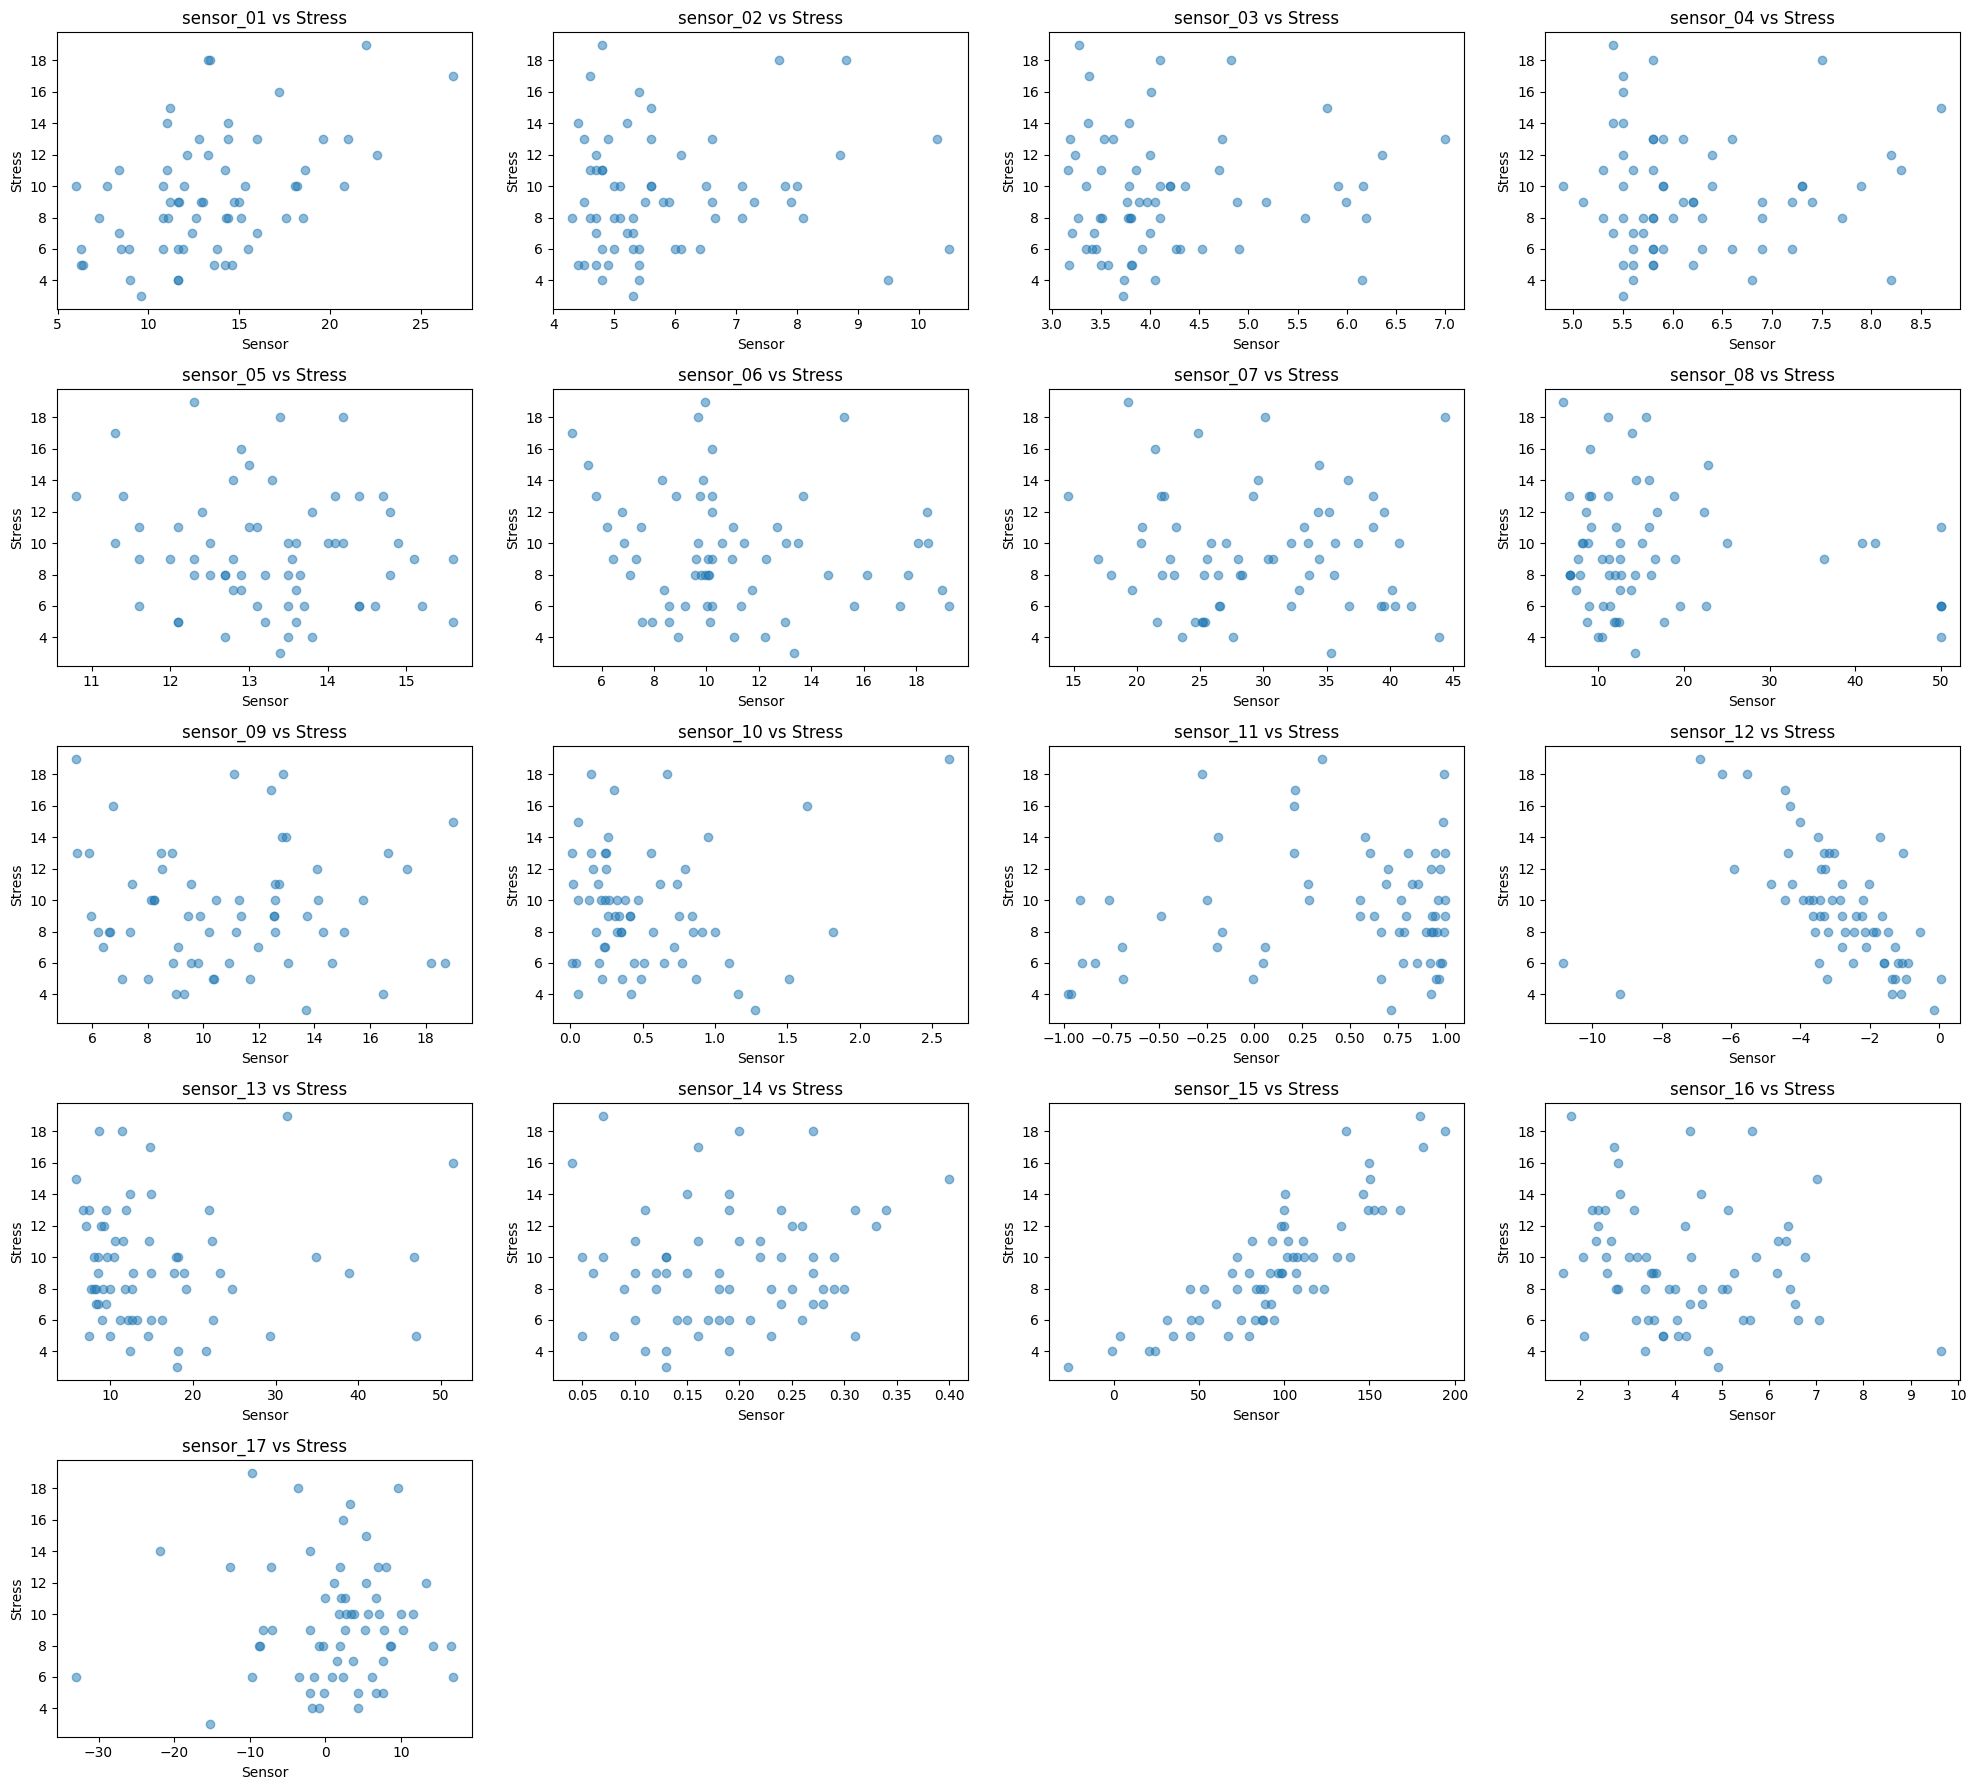

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lire les donnés
X = pd.read_csv("E2_sensor_vals.csv", sep=";")        # capteur
Y = pd.read_csv("E2_stress_vals.csv", usecols=["Stress"])  # stress

# Nuages de points (chaque sensor vs stress)
fig, axes = plt.subplots(5, 4, figsize=(20, 18))  # tableau 5x4 pour 17 capteur
axes = axes.flatten()

for i, sensor in enumerate(X.columns):
    axes[i].scatter(X[sensor], Y["Stress"], alpha=0.5)
    axes[i].set_title(f"{sensor} vs Stress")
    axes[i].set_xlabel("Sensor")
    axes[i].set_ylabel("Stress")

# Supprimer les axes supplémentaires (20 - 17 = 3)
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
# Corrélation de chaque capteur avec le stress
correlacoes = X.corrwith(Y["Stress"]).sort_values(ascending=False)
print(correlacoes)

sensor_15    0.845574
sensor_01    0.470126
sensor_11    0.132139
sensor_14    0.111020
sensor_02    0.089284
sensor_03    0.071238
sensor_10    0.046196
sensor_04    0.027863
sensor_13    0.017465
sensor_17    0.008452
sensor_09   -0.039165
sensor_07   -0.055890
sensor_05   -0.156953
sensor_08   -0.162455
sensor_06   -0.177900
sensor_16   -0.214664
sensor_12   -0.407346
dtype: float64


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.

#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.

### Réponses
2.2.1. La validation croisée en K-Fold est la meilleure option ici, car elle exploite l’ensemble du jeu de données, fournit une estimation plus stable et moins biaisée des performances du modèle, et présente un coût computationnel acceptable (nettement inférieur à celui du LOO).

2.2.2. Nous pouvons affirmer statistiquement qu’il existe une relation significative entre le niveau de stress et le capteur_15. Pour les autres, même si leurs valeurs sont statitiquement significatifs (un p-valeur faible), on a que leur pouvoir predictif est faible (un petit $R^2$) et très instable entre des folds différents. D'une telle façon que leur $R^2$ moyen avec 10 folds est même negatif, alors, ils sont pire que juste une estimation constante de la moyenne.

Explication : On construit un modèle de régression linéaire simple ($\text{stress} = b_0 + b_1 \cdot \text{capteur} + \epsilon$). Pour chaque régression, nous testons l’hypothèse nulle (H0) → $b_1 = 0$ et l’hypothèse alternative (H1) → $b_1 \neq 0$. Lors de l’estimation des paramètres, l’ajustement des modèles est réalisé par les Moindres Carrés Ordinaires (MCO/OLS). Pour le critère de décision, nous fixons un niveau de signification usuel de $\alpha = 0,05$. Si la valeur est inférieure, nous rejetons H0 et il existe alors une relation statistiquement significative. Si elle est supérieure ou égale, nous ne rejetons pas H0 et, par conséquent, il n’y a pas suffisamment d’évidence d’une relation significative.

Par contre, on va aussi regarder les valeurs de $R^2$ issus d'un K-folds avec k=10 pour voir l'utilité pratique d'utiliser les valeurs de chaque sensor en prédiction du stress de la voilure.


In [35]:
# 2.2.1

from sklearn.linear_model import LinearRegression

for sensor in ["sensor_01", "sensor_12", "sensor_15"]:
    X_sensor = X[[sensor]].to_numpy()
    Y_stress = Y["Stress"].to_numpy()
    lr = LinearRegression().fit(X_sensor, Y_stress)
    r2 = lr.score(X_sensor,Y_stress)
    print(f"{sensor}: R^2 = {r2:.3f}, coef = {lr.coef_[0]:.3f}, intercept = {lr.intercept_:.3f}")

# Validation croisée en regression linear
from sklearn.model_selection import KFold, cross_val_score
model = LinearRegression()

kf = KFold(n_splits=10,shuffle=True,random_state=42)

for sensor in ["sensor_01", "sensor_12", "sensor_15"]:
    X_sensor = X[[sensor]].to_numpy()
    scores = cross_val_score(model, X_sensor, Y, cv=kf, scoring="r2")
    print(f"\n{sensor}:")
    print("R2 moyen:", np.mean(scores).round(3))
    print("Écart type du R2:", np.std(scores).round(3))
    print("List des R2:", np.round(scores, 3))

sensor_01: R^2 = 0.221, coef = 0.412, intercept = 3.869
sensor_12: R^2 = 0.166, coef = -0.785, intercept = 7.010
sensor_15: R^2 = 0.715, coef = 0.070, intercept = 2.758

sensor_01:
R2 moyen: -0.113
Écart type du R2: 0.695
List des R2: [-2.152  0.333  0.285 -0.042 -0.102 -0.11   0.141  0.153  0.198  0.169]

sensor_12:
R2 moyen: -0.302
Écart type du R2: 1.635
List des R2: [ 0.353  0.386  0.169  0.529  0.127  0.181  0.023 -5.186  0.338  0.064]

sensor_15:
R2 moyen: 0.488
Écart type du R2: 0.402
List des R2: [-0.449  0.657  0.691 -0.023  0.33   0.61   0.634  0.68   0.933  0.821]


In [ ]:
# 2.2.2
import statsmodels.api as sm

for sensor in ["sensor_01", "sensor_12", "sensor_15"]:
    X_sensor = sm.add_constant(X[sensor])  # ajouter un terme constant (interception)
    model = sm.OLS(Y, X_sensor).fit()      # ajuster une régression linéaire
    
    print(f"\n--- {sensor} ---")
    print(model.pvalues) # La relation entre le stress et le capteur est donnée par la valeur de capteur_xx
    # ainsi, si cette valeur est inférieure à 0,05, nous pouvons affirmer qu’il existe une relation statistiquement significative entre le capteur et le stress.



--- sensor_01 ---
const        0.006583
sensor_01    0.000089
dtype: float64

--- sensor_12 ---
const        1.692651e-12
sensor_12    8.356908e-04
dtype: float64

--- sensor_15 ---
const        1.473966e-05
sensor_15    1.494895e-18
dtype: float64



### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.


### Réponses
2.3.1. On a choisi la stratégie de calculer la distance de Cook pour chaque point et ainsi évaluer les outliers potentiels. Normalement, le meilleur est d'avoir la possibilité de regarder le plot des distances de Cook pour faire la décision de garder ou enlever des points, néanmoins, comme il faut les détecter automatiquement, on va appliquer l'heuristique empirique d'utiliser 4/n comme critère de coupure.

2.3.2. Oui, cela serait possible. Dans un premier temps, nous obtiendrions les résidus à partir de l’ajustement de la régression linéaire simple du modèle. Ensuite, nous supposerions que les résidus suivent une distribution normale centrée avec une variance $\sigma^2$, ce qui implique que l'échantillon des résidus obtenu, après être normalisé par son écart type, suit une loi de student de $n-2$ dégrées de liberté. Dans le code, on a utilisé le methode `resid_studentized_external` qui implemente déjà la normalisation externe (qui ne considére pas le terme $h_{ii}$ pour suivre une loi t-sudent).

Par la suite, on procède à la détection elle-même. Comme $H_0$ on a utilisé l'hypothèse que le point $i$ n'est pas un outlier, donc, pour le critère de décision on a utilisé la probabilité d'avoir un résidu si extrême. Alors, il a été considéré que, en définissant $t_i \coloneqq -|x_i|$ où $x_i$ est la valeur du ième résidu et une variable aleatoire $T \sim t_{n-2}$, si $P(T \geq t_i) < 2,5\%$, il s’agit d’un résidu pour lequel l'hypothèse $H_0$ peut ne pas être valable, c'est à dire que le point est suspecté d’être un outlier, et si $P(T \geq t_i) < 0,2\%$, il s’agit d’un outlier fort et $H_0$ n'est pas valable.

N.B: Les valeurs de probabilité sont a peu près ceux pour $t = 2$ et $t = 3$, respectivement.

In [40]:
# 2.3.1
import statsmodels.api as sm
import numpy as np

# STRATÉGIE 1

# Definir X e Y
X_sensor12 = sm.add_constant(X["sensor_12"])  # adiciona intercepto
y = Y["Stress"]

# Ajuster le modèle OLS
model = sm.OLS(y, X_sensor12).fit()

# Calculer influence (inclure la distance de Cook)
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Critère de coupure
n = len(X_sensor12)
limite = 4 / n

# Identifier les outliers
outliers = np.where(cooks_d > limite)[0]

print("Limite:", limite)
print("Index des outliers:", outliers)
print("Distances de Cook des outliers:", cooks_d[outliers])

Limite: 0.0625
Index des outliers: [ 2 22 23 49 62]
Distances de Cook des outliers: [2.06214912 0.08864681 0.10950305 0.1757989  1.20659083]


In [53]:
from scipy.stats import t
# STRATÉGIE 2
# En utilisant les mêmes fonctions que celles déjà utilisées ci-dessus

resid_padronizados = influence.resid_studentized_external  # resíduos padronizados
residus_neg = -np.abs(resid_padronizados)

df = n-2
probas = t.cdf(residus_neg, df)

# Critère pour les outliers (|t| > 2 suspect, |t| > 3 outlier fort)
outliers_suspets = np.where(probas < 0.025)[0]
outliers_forts = np.where(probas < 0.002)[0]

# Afficher les résultats
print("Probabilités:")
print(probas)

print("\nValeurs aberrantes suspectées (|t| > 2):", outliers_suspets)
print("Valeurs aberrantes fortes (|t| > 3):", outliers_forts)

Probabilités:
[4.34974281e-01 3.28249170e-01 3.43005284e-04 4.69038854e-02
 4.23576628e-01 4.47871129e-01 4.28322885e-01 7.73369545e-02
 2.54592276e-01 4.18918929e-01 1.26063238e-01 1.14529556e-01
 4.20067008e-01 2.84876798e-01 4.40622178e-01 2.49191904e-01
 3.82501545e-01 4.40251669e-01 1.60811649e-01 4.71532265e-01
 4.74244554e-01 4.60060161e-01 2.28908231e-02 3.31753912e-02
 1.83072410e-01 3.05255837e-01 4.77507742e-01 2.07981798e-01
 4.81434121e-01 4.34440666e-01 1.05998434e-01 1.52628476e-01
 9.01278057e-02 4.88721209e-01 3.99223590e-01 2.96431054e-01
 4.84544380e-01 1.92290530e-01 3.14104808e-01 6.25286413e-02
 4.82240912e-02 3.70417678e-01 4.88575466e-01 4.66848272e-01
 4.21302091e-01 2.40195061e-01 2.25432051e-01 4.13501032e-01
 1.45317973e-01 2.18094288e-02 2.41541685e-01 2.64966536e-02
 4.94929425e-01 1.87007016e-01 2.52861300e-01 2.78107822e-01
 3.91641904e-01 3.54882332e-01 2.58312150e-01 3.00963188e-01
 1.37634404e-01 2.92135866e-01 2.95534728e-04 1.08085532e-01]

Valeurs 

### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?



### Réponses
2.4.1. La réduction est utile parce qu’elle met toutes les variables sur la même échelle, elle évite, donc, que la régularisation pénalise certaines plus que d’autres uniquement à cause des unités, et elle améliore, alors, l’interprétation ainsi que la stabilité numérique. En plus, la centralisation est nécessaire parce qu'elle est une hypothèse des régularisations car ils ne comptent pas le $\beta_0$ dans les pénalisations puisqu'il sert comme l'estimateur de l'origine d'Y pour pas la laisser influencer l'estimation des autres $\hat{\beta_j}$.

2.4.2. La démarche sera d'utiliser le modèle de Lasso (pour une pénalisation L1) avec une validation croisée par K-folds avec k=10. Au lieu de faire le plot d'un graphique de coude pour choisir le paramètre de pénalisation, on utilisera l'implementation de scikit-learn qui balade pour 100 valeurs de $\alpha$ et choisit la meilleure en jugeant par celle qui minimise l'erreur des moindres carrés.

Comme résultat, on a obtenu que le capteur 15 reste le plus important, le capteur 12 sans outliers présente une variable pertinente mais avec un effet négatif, le capteur 01 contribue de manière plus faible, le capteur 08 a un poids très faible (proche de l’insignifiant). Les autres ont été écartés par le Lasso.

L’utilisation des données des capteurs est partiellement fiable, car certains capteurs (15 et 12) saisissent bien la relation avec le stress, tandis que d’autres sont non pertinents ou redondants, et la présence d’outliers demande de la prudence.

2.4.3. Je rapporterais les résultats en deux étapes (avec et sans outliers), je discuterais de leur impact sur le modèle et je justifierais la décision méthodologique de les retirer comme fait dans la question 2.3.2.

In [ ]:
# 2.4

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supprimer les outliers
X_clean = X.drop(index=[2, 62]).reset_index(drop=True)
Y_clean = Y.drop(index=[2, 62]).reset_index(drop=True)

# 2.4.1 - Centrage réduction des données 

# X contient les capteurs en colonnes
scaler = StandardScaler()

# Ajuster aux données et transformer
X_scaled = scaler.fit_transform(X_clean)

# Convertir de nouveau en DataFrame (optionnel)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_clean.columns)


In [57]:
# 2.4.2 - Régression linéaire régularisée avec LassoCV
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

# Créer un pipeline : standardisation + LassoCV
lasso = make_pipeline(StandardScaler(), LassoCV(cv=10, random_state=42))

# Ajuster le modèle
lasso.fit(X_clean, Y_clean["Stress"])

# Voir la démarche
alphas_tested = lasso.named_steps['lassocv'].alphas_
alpha_optim = lasso.named_steps['lassocv'].alpha_
mses = lasso.named_steps['lassocv'].mse_path_

# Obtenir les coefficients
coef = lasso.named_steps['lassocv'].coef_

# Organiser les résultats
resultados_final = pd.DataFrame({
    "Sensor": X_clean.columns,
    "Coefficient": coef
}).sort_values(by="Coefficient", key=abs, ascending=False)

In [59]:
print('Après voir les alphas et erreurs carrés suivantes:')

for alpha, mse in zip(alphas_tested, mses):
    print(f"Alpha = {alpha}, MSE = {mse}")

Après voir les alphas et erreurs carrés suivantes:
Alpha = 3.0721662775009113, MSE = [ 8.07074696 14.24972845  4.17090405 31.89115646 13.04368622  3.76863031
  9.82913727 23.21088435 18.84895833 13.90508078]
Alpha = 2.865112552579113, MSE = [ 7.34393824 13.37506425  3.81411233 31.89115646 11.78321251  3.58303048
  9.00038087 23.1689513  18.18532234 12.93915507]
Alpha = 2.6720135557324056, MSE = [ 6.70877812 11.79447653  3.51433519 30.73533418 10.6579596   3.42413557
  8.28506853 21.08576774 16.55833506 11.38930309]
Alpha = 2.4919287849933744, MSE = [ 6.25591629 10.42915936  3.2634359  28.57190334  9.71181293  3.28829668
  7.69423546 19.24718975 15.13663612 10.07391028]
Alpha = 2.323981125079457, MSE = [ 5.85702529  9.25044018  3.03987562 26.64330299  8.8987052   3.17214616
  7.22643222 17.62315882 13.89393324  8.93266526]
Alpha = 2.1673525753425325, MSE = [ 5.50545504  8.10914602  2.77032702 24.92211106  8.19734301  3.06873729
  6.81491587 16.18741013 12.80732863  7.95184096]
Alpha = 2

In [61]:
print(f"L'optimal a été trouvé comme étant: {alpha_optim}")
print('Ce qui nous donne comme résultat:')
print(resultados_final)

L'optimal a été trouvé comme étant: 0.24919287849933752
Ce qui nous donne comme résultat:
       Sensor  Coefficient
14  sensor_15     2.052724
11  sensor_12    -1.232500
0   sensor_01     0.138923
7   sensor_08    -0.027311
1   sensor_02    -0.000000
4   sensor_05    -0.000000
5   sensor_06    -0.000000
3   sensor_04    -0.000000
2   sensor_03    -0.000000
8   sensor_09    -0.000000
6   sensor_07     0.000000
10  sensor_11    -0.000000
9   sensor_10     0.000000
12  sensor_13    -0.000000
13  sensor_14     0.000000
15  sensor_16    -0.000000
16  sensor_17    -0.000000
